# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
data = pd.read_csv('./data/application_train_vf.csv')
previous_app = pd.read_csv('./data/previous_application.csv')

# Courte analyse exploratoire de previous_app

In [3]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Text(0.5, 1.0, 'Nombre de valeurs manquantes des variables catégorielles et numériques')

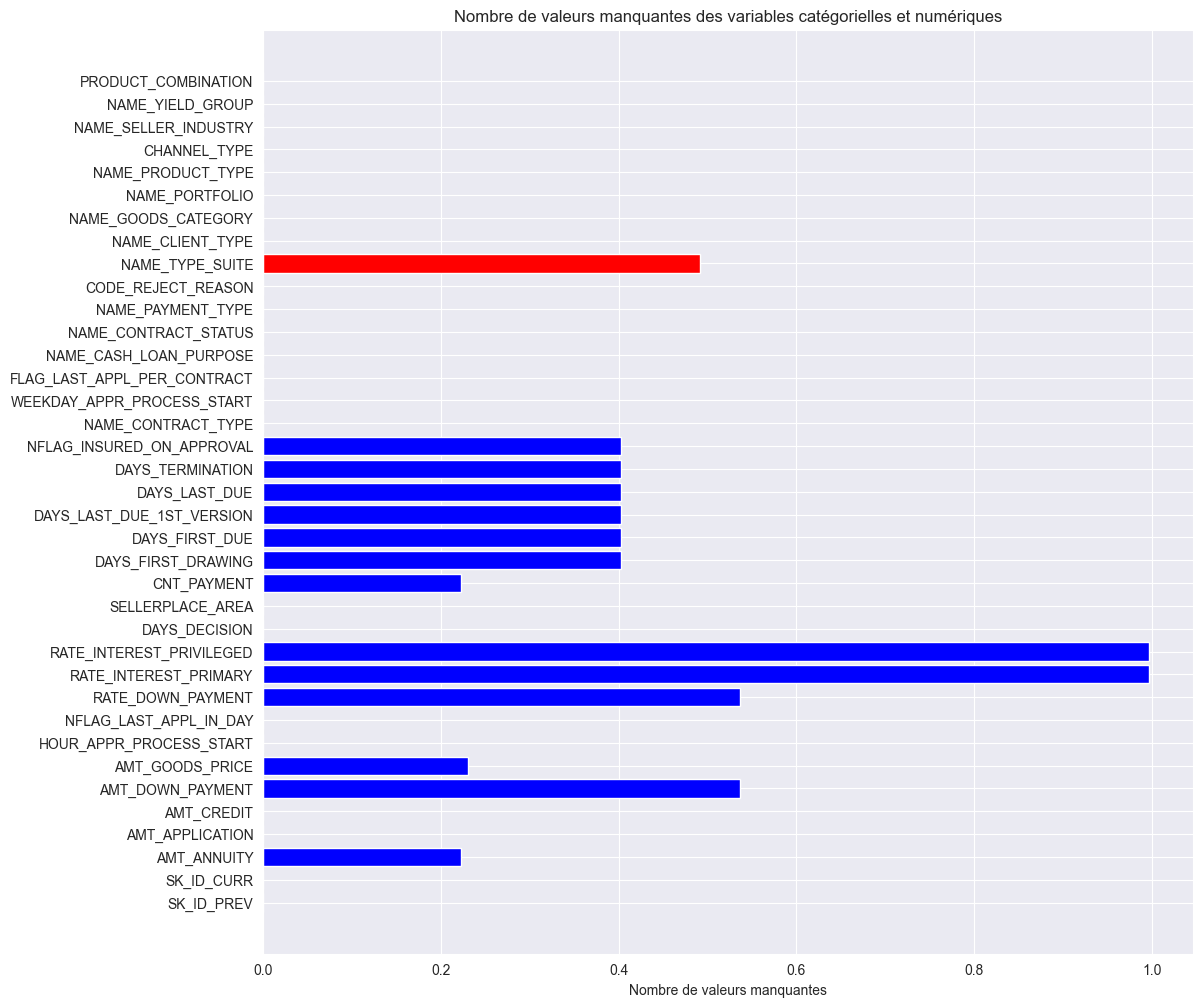

In [5]:
# Identification des variables catégorielles et numériques
variables_catégoriques = previous_app.select_dtypes(include='object').columns
variables_numériques = previous_app.select_dtypes(exclude='object').columns

# Comptage des valeurs manquantes
missing_values = previous_app.isna().sum()/previous_app.shape[0]

# Création du graphique avec des couleurs différentes pour les variables catégorielles et numériques
plt.figure(figsize=(12, 12
                    ))

for variable in variables_numériques:
    plt.barh(variable, missing_values[variable], color='blue', label='Numérique')

for variable in variables_catégoriques:
    plt.barh(variable, missing_values[variable], color='red', label='Catégorique')

plt.xlabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables catégorielles et numériques')

# Data treatment de previous_app

In [6]:
for col in previous_app.columns:
    if previous_app[col].isna().sum()/previous_app.shape[0]>0.25:
        previous_app = previous_app.drop(columns = [col])

In [7]:
previous_app.drop(columns = ['PRODUCT_COMBINATION'], inplace = True)

In [8]:
for col in previous_app.columns:
    if previous_app[col].isna().sum() > 0:
        previous_app[col].fillna(previous_app[col].mean(), inplace=True)
    else:
        pass

# Encoding de previous app

In [9]:
previous_app.select_dtypes(include = 'object').nunique()

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
dtype: int64

In [10]:

for col in previous_app.select_dtypes(include='object').columns:
    if previous_app[col].nunique() > 10:
        # Utilisation de Label Encoding avec scikit-learn
        label_encoder = LabelEncoder()
        previous_app[col] = label_encoder.fit_transform(previous_app[col])
    else:
        # Utilisation de One-Hot Encoding avec pd.get_dummies
        previous_app = pd.get_dummies(previous_app, columns=[col], prefix=[col])


# Data treatment de data

In [11]:
data.drop(columns = 'Unnamed: 0',inplace = True)

In [12]:
data = data[['SK_ID_CURR','TARGET', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']]

In [13]:
data.drop(columns =['OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_3'],inplace = True)

In [14]:
data.dropna(inplace = True)

# Merging data bases

In [15]:
df = data.merge(previous_app, on = 'SK_ID_CURR')

In [16]:
df.shape

(1405010, 76)